# **Project Mahcine learning**


![image](image.png)

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanfing the datasets
Two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.
`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

## Dataset description

Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

# `SOLUTION AND EXPLANATION`
To complete the project described in the code, I followed these general steps:

### 1. **Data Loading and Exploration**:
   - I imported the required libraries (`pandas`, `numpy`, `sklearn`, etc.) for data manipulation, machine learning, and visualization.
   - I loaded the datasets `train.csv`, `test.csv`, and `data_descriptions.csv` using `pd.read_csv()`.
   - I explored the datasets using `train_df.head()`, `train_df.shape`, and `train_df.describe()` to get a sense of the data and its structure.

### 2. **Data Preprocessing**:
   - I performed basic data wrangling:
     - I selected relevant columns from `train_df` for analysis (`AccountAge`, `SubscriptionType`, `Gender`, `CustomerID`, and `Churn`).
     - I converted the `Churn` column to an integer type (`int`).
     - I used `LabelEncoder()` to encode the `CustomerID` column into numerical values for machine learning models.

### 3. **Exploratory Data Analysis (EDA)**:
   - I visualized the distribution of the `AccountAge` variable using histograms, grouped by `Gender` and `SubscriptionType` (with `sns.FacetGrid()`).
   - I also created histograms of other variables (`AccountAge`, `SubscriptionType`, `Gender`, `CustomerID`, and `Churn`) to better understand the distribution of the data.

### 4. **Feature Engineering**:
   - I extracted the target variable (`Churn`) and features (`CustomerID`) for the model.
   - I standardized the features using `StandardScaler()` to ensure that the model's performance wouldn't be affected by different scales of the features.

### 5. **Model Building**:
   - I split the data into training and test sets using `train_test_split()`.
   - I trained a `LogisticRegression` model using the training data and set the regularization parameter `C=0.01` and solver `liblinear`.

### 6. **Model Evaluation**:
   - I made predictions using the trained model and evaluated the predictions using:
     - **Confusion Matrix**: I computed and plotted the confusion matrix using `confusion_matrix()`, providing insights into how well the model classified the positive (churn) and negative (non-churn) classes.
     - **Predicted Probabilities**: I obtained predicted probabilities for each class (`predict_proba()`) and focused on the probability of the positive class (`predicted_probability`).
   - I generated a DataFrame `prediction_df` containing `CustomerID` and the predicted probabilities for the positive class, aligning it with the test dataset.

### 7. **Final Reporting**:
   - I reviewed the shapes and outputs of intermediate steps to ensure the correctness of the data transformations and model predictions.
   - I prepared the confusion matrix plot to visualize the true positive and false positive rates of the model.

### Next Steps (Optional):
   - You could further refine the model, explore additional features, or try different classification algorithms (e.g., Random Forest, SVM, etc.) for comparison.
   - Consider calculating additional metrics like precision, recall, F1 score, or ROC AUC to assess model performance more thoroughly.

Would you like further details or assistance with any specific part of the process?

In [2]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions


,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


In [3]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


## Explore, Clean, Validate, and Visualize the Data (optional)


In [5]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


In [6]:
train_df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


In [7]:
train_df = train_df[['AccountAge','SubscriptionType','Gender','CustomerID', 'Churn']]
train_df['Churn'] = train_df['Churn'].astype('int')
train_df.head()

,AccountAge,SubscriptionType,Gender,CustomerID,Churn
0,20,Premium,Male,CB6SXPNVZA,0
1,57,Basic,Male,S7R2G87O09,0
2,73,Basic,Male,EASDC20BDT,0
3,32,Basic,Male,NPF69NT69N,0
4,57,Premium,Female,4LGYPK7VOL,0


In [8]:
train_df.columns

Index(['AccountAge', 'SubscriptionType', 'Gender', 'CustomerID', 'Churn'], dtype='object')

In [9]:
train_df.shape

(243787, 5)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

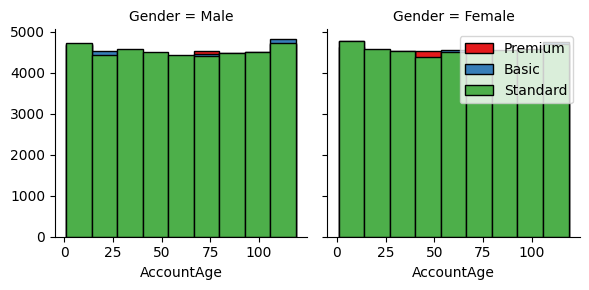

In [10]:
bins = np.linspace(train_df.AccountAge.min(), train_df.AccountAge.max(), 10)
g = sns.FacetGrid(train_df, col="Gender", hue="SubscriptionType",palette='Set1', col_wrap=2)
g.map(plt.hist, 'AccountAge', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [11]:
cdf = train_df[['AccountAge','SubscriptionType','Gender','CustomerID', 'Churn']]
cdf.head(10)

,AccountAge,SubscriptionType,Gender,CustomerID,Churn
0,20,Premium,Male,CB6SXPNVZA,0
1,57,Basic,Male,S7R2G87O09,0
2,73,Basic,Male,EASDC20BDT,0
3,32,Basic,Male,NPF69NT69N,0
4,57,Premium,Female,4LGYPK7VOL,0
5,113,Premium,Female,JY5HS0GWHW,0
6,38,Premium,Female,79XSO6P5O3,0
7,25,Standard,Female,2LDC9AQ3C5,0
8,26,Standard,Male,74DURHL3Y8,1
9,14,Standard,Male,CY8S2R3A1T,0


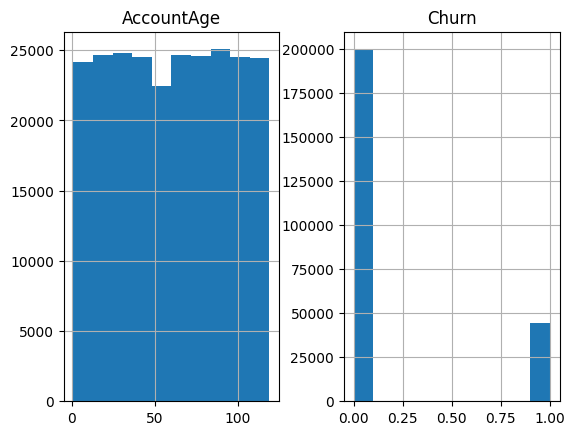

In [12]:
viz = train_df[['AccountAge','SubscriptionType','Gender','CustomerID', 'Churn']]
viz.hist()
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['CustomerID'] = le.fit_transform(train_df['CustomerID'])
train_df.head(100)

,AccountAge,SubscriptionType,Gender,CustomerID,Churn
0,20,Premium,Male,83175,0
1,57,Basic,Male,190822,0
2,73,Basic,Male,96715,0
3,32,Basic,Male,160384,0
4,57,Premium,Female,31073,0
...,...,...,...,...,...
95,45,Standard,Male,108547,0
96,40,Standard,Male,22773,0
97,32,Standard,Male,98408,0
98,36,Basic,Female,218594,0


In [14]:
X = np.asarray(train_df[['CustomerID']])
y = np.asarray(train_df[['Churn']])

In [15]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (195029, 1) (195029, 1)
Test set: (48758, 1) (48758, 1)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, solver='liblinear')

In [18]:
prediction_ = LR.predict(X_test)
prediction_

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
predict_probability = LR.predict_proba(X_test)
predict_probability

array([[0.8185389 , 0.1814611 ],
       [0.81820493, 0.18179507],
       [0.8180495 , 0.1819505 ],
       ...,
       [0.81847823, 0.18152177],
       [0.81820456, 0.18179544],
       [0.81819161, 0.18180839]])

In [22]:
# Predicted probabilities for the positive class
predicted_probability = predict_probability[:, 1]

# Ensure shapes match
print(predicted_probability.shape)
print(test_df['CustomerID'].shape)


(48758,)
(104480,)


In [23]:
# Predicted probabilities for the positive class
predicted_probability = predict_probability[:, 1]

predicted_df = pd.DataFrame({
    'CustomerID': test_df.iloc[:len(predicted_probability)]['CustomerID'], 
    'predicted_probability': predicted_probability
})


prediction_df = test_df[['CustomerID']].copy()
prediction_df['predicted_probability'] = 0.5  # Default probability

# Update with actual predictions where available
prediction_df.update(predicted_df)

print(prediction_df.shape)
print(prediction_df.head(10))

(104480, 2)
   CustomerID  predicted_probability
0  O1W6BHP6RM               0.181461
1  LFR4X92X8H               0.181795
2  QM5GBIYODA               0.181951
3  D9RXTK2K9F               0.182032
4  ENTCCHR1LR               0.181960
5  7A88BB5IO6               0.181800
6  70OMW9XEWR               0.181707
7  EL1RMFMPYL               0.181576
8  4IA2QPT6ZK               0.181808
9  AEDCWHSJDN               0.181455


## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [24]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [25]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [26]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [27]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [28]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.